In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [6]:
# Working with a portfolio of Proctor and Gamble, Microsoft, Ford, General Electric stocks
# loading the data from yahoo finance
tickers = ['PG', 'MSFT', 'F', 'GE']
df = pd.DataFrame()
for t in tickers:
    df[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [7]:
#  checking data integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6335 entries, 1995-01-03 to 2020-03-02
Data columns (total 4 columns):
PG      6335 non-null float64
MSFT    6335 non-null float64
F       6335 non-null float64
GE      6335 non-null float64
dtypes: float64(4)
memory usage: 247.5 KB


In [8]:
df.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362402,2.413537,3.200019,2.731941
1995-01-04,6.311406,2.431082,3.286119,2.731941
1995-01-05,6.222151,2.390982,3.257418,2.738635
1995-01-06,6.234900,2.431082,3.257418,2.725244
1995-01-09,6.209402,2.416045,3.314818,2.698461


In [9]:
df.tail()

,PG,MSFT,F,GE
Date,,,,
2020-02-25,121.430000,168.070007,7.23,11.32
2020-02-26,120.160004,170.169998,7.21,10.95
2020-02-27,113.500000,158.179993,6.97,10.39
2020-02-28,113.230003,162.009995,6.96,10.88
2020-03-02,119.559998,172.789993,7.20,11.21


## Normalize to 100

In [11]:
# select the first row
df.iloc[0]

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

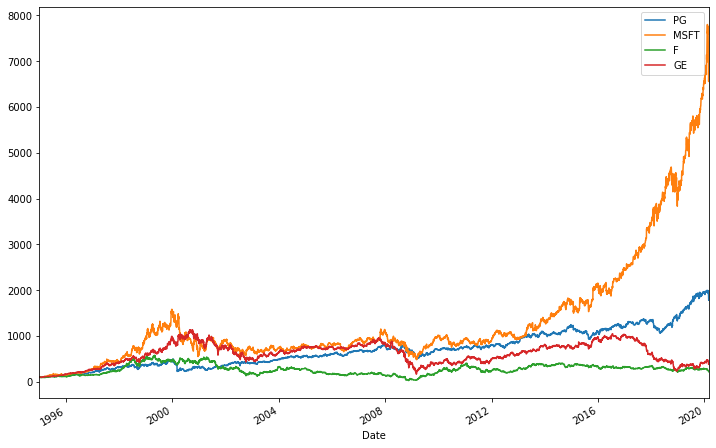

In [15]:
# compare stocks like they were starting from the same point 100(normalization)
(df/df.iloc[0] * 100).plot(figsize=(12,8))
plt.show()

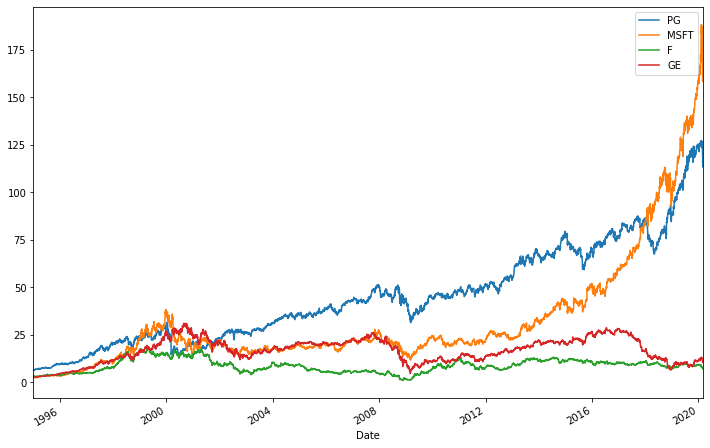

In [17]:
# Non normalized plot
df.plot(figsize=(12,8))
plt.show()

In [18]:
# loc uses labels
df.loc['1995-01-03']

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

In [20]:
# iloc uses location/index
df.iloc[0]

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

## Claculating the return of a portfolio of Securities

In [21]:
returns = (df/df.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002450
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [22]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [23]:
np.dot(returns, weights)

array([        nan,  0.00654002, -0.00923006, ..., -0.05257844,
        0.01689003,  0.04681414])

In [26]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.140416
MSFT    0.216838
F       0.108573
GE      0.101740
dtype: float64

In [27]:
np.dot(annual_returns, weights)

0.1418918812331731

In [29]:
pfolio1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
pfolio1

'14.188999999999998 %'